<a href="https://colab.research.google.com/github/kdstheace/Project_FinancialAnalysis/blob/main/Financial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import seaborn as sns
sns.set(style='darkgrid')

In [ ]:
#랜덤시드

np.random.randomseed(1)

In [2]:
#この部分はデータセットや結果を一部あるいは全部見る時使われる部分なので実行しなくても構いません。
# pd.set_option('display.max_row', 100)
# pd.set_option('display.max_columns', 100)

In [3]:
#データセットを呼び出す
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#データ前処理(Preprocessing)-1
raw_data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/bankruptcy_data.csv')
# raw_data = pd.read_csv('drive/MyDrive/Colab Notebooks/Data/data.csv')

raw_data.columns = raw_data.columns.str.strip()
raw_data.columns = raw_data.columns.str.replace(" " ,"_")
raw_data.rename(columns = {'Bankrupt?' :'Bankrupt' },inplace=True)

X = raw_data.drop('Bankrupt', axis=1).drop('Liability-Assets_Flag', axis=1).drop('Net_Income_Flag', axis=1)\
            .drop('Revenue_Per_Share_(Yuan_¥)', axis=1).drop('Operating_Profit_Per_Share_(Yuan_¥)', axis=1)\
            .drop('Per_Share_Net_profit_before_tax_(Yuan_¥)', axis=1).drop('Interest-bearing_debt_interest_rate', axis=1)\
            .drop('No-credit_Interval', axis=1)\
            .drop('Long-term_fund_suitability_ratio_(A)', axis=1)\
            .drop('Borrowing_dependency', axis=1)\
            .drop('Operating_profit_per_person', axis=1)\
            .drop('ROA(C)_before_interest_and_depreciation_before_interest', axis=1)\
            .drop('ROA(A)_before_interest_and_%_after_tax', axis=1)\
            .drop('Net_Value_Per_Share_(B)', axis=1)\
            .drop('Net_Value_Per_Share_(A)', axis=1)\
            .drop('Net_Value_Per_Share_(C)', axis=1)\
            .drop('Realized_Sales_Gross_Margin', axis=1)\
            .drop('Realized_Sales_Gross_Profit_Growth_Rate', axis=1)\
            .drop('Interest_Coverage_Ratio_(Interest_expense_to_EBIT)', axis=1)\
            .drop('Cash_Reinvestment_%', axis=1).drop('Interest_Expense_Ratio', axis=1).drop('Contingent_liabilities/Net_worth', axis=1)\
            .drop('Operating_profit/Paid-in_capital', axis=1).drop('Net_profit_before_tax/Paid-in_capital', axis=1)\
            .drop('Cash_flow_rate', axis=1)

y = np.array(raw_data['Bankrupt'])
print(X.shape)
print(y.shape)

(6819, 71)
(6819,)


In [5]:
#データ完全性確認
X.isnull().sum()

ROA(B)_before_interest_and_depreciation_after_tax    0
Operating_Gross_Margin                               0
Operating_Profit_Rate                                0
Pre-tax_net_Interest_Rate                            0
After-tax_net_Interest_Rate                          0
                                                    ..
Gross_Profit_to_Sales                                0
Net_Income_to_Stockholder's_Equity                   0
Liability_to_Equity                                  0
Degree_of_Financial_Leverage_(DFL)                   0
Equity_to_Liability                                  0
Length: 71, dtype: int64

In [6]:
#データ前処理(Preprocessing)-2：スケーリング・One-Hot Encoding
# scaler = StandardScaler()
# scaled_X = scaler.fit_transform(X)
# scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
# display(scaled_X)

# categorized_y = to_categorical(y)
# print(categorized_y.shape)
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
display(scaled_X)

categorized_y = to_categorical(y)
print(categorized_y.shape)

,ROA(B)_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Operating_Profit_Rate,Pre-tax_net_Interest_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,Continuous_interest_rate_(after_tax),Operating_Expense_Rate,Research_and_development_expense_rate,Tax_rate_(A),Persistent_EPS_in_the_Last_Four_Seasons,Cash_Flow_Per_Share,Operating_Profit_Growth_Rate,After-tax_Net_Profit_Growth_Rate,Regular_Net_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Current_Ratio,Quick_Ratio,Total_debt/Total_net_worth,Debt_ratio_%,Net_worth/Assets,Inventory_and_accounts_receivable/Net_value,Total_Asset_Turnover,Accounts_Receivable_Turnover,Average_Collection_Days,Inventory_Turnover_Rate_(times),Fixed_Assets_Turnover_Frequency,Net_Worth_Turnover_Rate_(times),Revenue_per_person,Allocation_rate_per_person,Working_Capital_to_Total_Assets,Quick_Assets/Total_Assets,Current_Assets/Total_Assets,Cash/Total_Assets,Quick_Assets/Current_Liability,Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Inventory/Current_Liability,Current_Liabilities/Liability,Working_Capital/Equity,Current_Liabilities/Equity,Long-term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income/Total_expense,Total_expense/Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Working_capitcal_Turnover_Rate,Cash_Turnover_Rate,Cash_Flow_to_Sales,Fixed_Assets_to_Assets,Current_Liability_to_Liability,Current_Liability_to_Equity,Equity_to_Long-term_Liability,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_(DFL),Equity_to_Liability
0,0.405750,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.258227e-14,0.000000e+00,0.000000,0.169141,0.311664,0.848195,0.688979,0.688979,0.217535,0.498498,3.504580e-14,0.263100,8.214412e-13,1.308510e-13,2.139429e-12,0.207576,0.792424,0.398036,0.086957,1.862304e-13,3.584136e-13,1.822749e-14,1.166173e-14,0.032903,3.877887e-12,3.880387e-12,0.672775,0.166673,0.190643,0.004094,2.263913e-13,1.526798e-14,0.147308,0.334015,0.276920,1.045399e-13,0.676269,0.721275,0.339077,2.682638e-12,0.903225,0.002022,0.064856,7.010000e-02,6.550000e-01,0.593831,4.580000e-02,0.671568,5.098627e-11,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0.716845,9.388432e-13,0.601453,0.827890,0.290202,0.026601,0.016469
1,0.516730,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.900751e-14,0.000000e+00,0.000000,0.208944,0.318137,0.848088,0.689693,0.689702,0.217620,0.611612,4.748554e-14,0.264516,2.187711e-12,4.376345e-13,1.257786e-12,0.171176,0.828824,0.397725,0.064468,1.320694e-13,5.053246e-13,9.369369e-01,7.197197e-02,0.025484,7.819127e-13,1.288921e-12,0.751111,0.127236,0.182419,0.014948,4.689376e-13,1.434104e-13,0.056963,0.341106,0.289642,5.256995e-13,0.308589,0.731975,0.329740,2.510149e-12,0.931065,0.002226,0.025516,1.065198e-14,7.700000e-01,0.593916,2.490000e-01,0.671570,5.634953e-11,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0.795297,8.475867e-13,0.610237,0.839969,0.283846,0.264577,0.020794
2,0.472295,0.601450,0.998857,0.796403,0.808388,0.302035,0.780284,2.363661e-14,2.555110e-03,0.000000,0.180581,0.307102,0.848094,0.689463,0.689470,0.217601,0.728729,4.248932e-14,0.264184,4.197292e-12,5.793673e-13,2.137594e-12,0.207516,0.792484,0.406580,0.014993,1.535255e-13,4.344141e-13,6.506507e-03,2.652653e-01,0.013387,3.291369e-12,1.473525e-11,0.829502,0.340201,0.602806,0.000991,7.145671e-13,5.533679e-01,0.098162,0.336731,0.277456,1.400483e-12,0.446027,0.742729,0.334777,3.894251e-13,0.909903,0.002060,0.021387,1.791094e-13,1.022676e-13,0.594502,7.610000e-02,0.671571,3.319462e-11,0.446027,0.334777,0.117922,0.642765,0.

(6819, 2)


In [7]:
#データ前処理(Preprocessing)-3：スケーリング・One-Hot Encoding
X_train, X_test, y_train, y_test = train_test_split(scaled_X, categorized_y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5455, 71)
(1364, 71)
(5455, 2)
(1364, 2)


In [8]:
#マシンラーニングモデル設計
model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=71))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               7200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 13,807
Trainable params: 13,807
Non-trainable params: 0
_________________________________________________________________


In [9]:
#学習
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
171/171 [==============================] - 2s 5ms/step - loss: 0.3820 - accuracy: 0.9046 - val_loss: 0.1510 - val_accuracy: 0.9633
Epoch 2/50
171/171 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9697 - val_loss: 0.1450 - val_accuracy: 0.9633
Epoch 3/50
171/171 [==============================] - 0s 3ms/step - loss: 0.1275 - accuracy: 0.9693 - val_loss: 0.1400 - val_accuracy: 0.9633
Epoch 4/50
171/171 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9699 - val_loss: 0.1252 - val_accuracy: 0.9633
Epoch 5/50
171/171 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.9682 - val_loss: 0.1155 - val_accuracy: 0.9619
Epoch 6/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9711 - val_loss: 0.1124 - val_accuracy: 0.9619
Epoch 7/50
171/171 [==============================] - 0s 3ms/step - loss: 0.0946 - accuracy: 0.9694 - val_loss: 0.1115 - val_accuracy: 0.9611
Epoch 

モデル生成が進めていく時のLOSSとACCURACYの変化です。


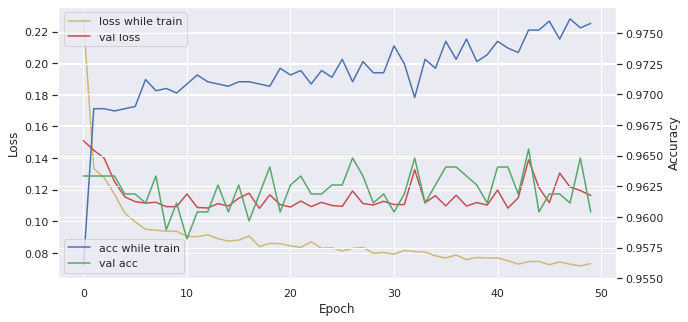

In [10]:
#学習過程を図式化
#Visualize Learning Process

plt.rcParams['figure.figsize'] = (10, 5)
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()


loss_ax.plot(hist.history['loss'], 'y', label='loss while train')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


acc_ax.plot(hist.history['accuracy'], 'b', label='acc while train')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
print('モデル生成が進めていく時のLOSSとACCURACYの変化です。')
plt.show()

In [18]:
#モデル評価
#Model Evaluation

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

64/64 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.9653

loss: 12.87%

accuracy: 96.53%


In [12]:
#testデータ1364個をモデルで予測した時の予測失敗データ及びアキュラシー検証
#test데이터 1364개를 모델로 예측해보았을 때 예측실패 데이터와 예측정확도 검증 

pred = model.predict(X_test)
count = 0
for i in range(1364):
  if np.argmax(pred[i]) != np.argmax(y_test[i]):
    print(i, end=' ')
    count += 1
print()
print('↑ これが1364個のテストデータセット中で間違っているデータのINDEXです。')
print('全体テストデータセット1364個の中で予測が間違ったのは　', count, '個になります。')
print()
print('Accuracy:', 100-(count/1364*100), '%')

11 39 73 88 128 209 214 303 332 374 432 458 465 466 476 487 591 649 668 703 707 749 784 787 810 834 887 897 901 915 995 998 1013 1017 1031 1073 1081 1086 1134 1144 1164 1171 1172 1173 1185 1252 1262 1270 1272 1280 1310 1320 1340 1343 
↑ これが1364個のテストデータセット中で間違っているデータのINDEXです。
全体テストデータセット1364個の中で予測が間違ったのは　 54 個になります。

Accuracy: 96.04105571847508 %


In [13]:
#testデータ1364個をモデルで予測した時の予測失敗データ及びアキュラシー検証
#test데이터에서 랜덤으로 30% split한 410개 데이터를 예측해보았을 때 정확도

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=1)
pred = model.predict(X_test)
print(X_test.shape)
count = 0
for i in range(410):
  if np.argmax(pred[i]) != np.argmax(y_test[i]):
    print(i, end=' ')
    count += 1
print()
print('↑ これが1364個のテストデータセットから抽出した410個の中で間違っているデータのINDEXです。')
print('1364個のテストデータセットから抽出した410個の中で予測が間違ったのは　', count, '個になります。')
print()
print('Accuracy:', 100-(count/410*100), '%')

(410, 71)
62 88 97 144 152 194 198 211 226 232 284 293 402 
↑ これが1364個のテストデータセットから抽出した410個の中で間違っているデータのINDEXです。
1364個のテストデータセットから抽出した410個の中で予測が間違ったのは　 13 個になります。

Accuracy: 96.82926829268293 %


In [14]:
#sample
labels=['not_bankrupted', 'bankrupted']
i=7
print(i, "番目の会社の予測した結果: ", labels[np.argmax(y_test[i])])
print(i, "番目の会社の実際結果: ", labels[np.argmax(pred[i])])

7 番目の会社の予測した結果:  not_bankrupted
7 番目の会社の実際結果:  not_bankrupted


In [15]:
#User Interface
X_train, X_test, y_train, y_test = train_test_split(scaled_X, categorized_y, test_size=0.2, random_state=1)
print(X_train.shape)
display(X_train)
X_train['ROA(B)_before_interest_and_depreciation_after_tax']
X_train.columns


(5455, 71)


,ROA(B)_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Operating_Profit_Rate,Pre-tax_net_Interest_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,Continuous_interest_rate_(after_tax),Operating_Expense_Rate,Research_and_development_expense_rate,Tax_rate_(A),Persistent_EPS_in_the_Last_Four_Seasons,Cash_Flow_Per_Share,Operating_Profit_Growth_Rate,After-tax_Net_Profit_Growth_Rate,Regular_Net_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Current_Ratio,Quick_Ratio,Total_debt/Total_net_worth,Debt_ratio_%,Net_worth/Assets,Inventory_and_accounts_receivable/Net_value,Total_Asset_Turnover,Accounts_Receivable_Turnover,Average_Collection_Days,Inventory_Turnover_Rate_(times),Fixed_Assets_Turnover_Frequency,Net_Worth_Turnover_Rate_(times),Revenue_per_person,Allocation_rate_per_person,Working_Capital_to_Total_Assets,Quick_Assets/Total_Assets,Current_Assets/Total_Assets,Cash/Total_Assets,Quick_Assets/Current_Liability,Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Inventory/Current_Liability,Current_Liabilities/Liability,Working_Capital/Equity,Current_Liabilities/Equity,Long-term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income/Total_expense,Total_expense/Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Working_capitcal_Turnover_Rate,Cash_Turnover_Rate,Cash_Flow_to_Sales,Fixed_Assets_to_Assets,Current_Liability_to_Liability,Current_Liability_to_Equity,Equity_to_Long-term_Liability,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_(DFL),Equity_to_Liability
2490,0.457733,0.000000,0.988045,0.784312,0.796607,0.303526,0.767874,1.408821e-13,0.000000e+00,0.000000,0.198733,0.314600,0.847191,0.683591,0.683591,0.216859,8.588589e-01,5.575285e-14,0.262968,3.636364e-10,1.083424e-10,4.768612e-02,0.001512,0.998488,0.393663,0.001499,5.067383e-12,1.316406e-14,1.911912e-03,0.000000e+00,0.009032,1.064335e-12,0.000000e+00,0.818355,0.253038,0.242417,0.000904,1.133787e-10,1.042670e-12,0.000000,0.231268,0.276975,0.000000e+00,0.063817,0.734745,0.326175,0.000000e+00,0.931764,0.000000,0.002266,7.307076e-13,7.655675e-13,0.598915,6.880000e-01,0.670041,0.000000e+00,0.063817,0.326175,0.110933,0.616908,0.343844,0.544180,0.312115,0.000000,0.766285,2.511440e-13,0.000000,0.838652,0.274813,0.026789,0.743588
6721,0.531774,0.617492,0.999009,0.797387,0.809315,0.303436,0.781573,3.414691e-14,1.736983e-14,0.000000,0.215562,0.315555,0.848025,0.689224,0.689224,0.217573,6.686687e-01,4.739728e-14,0.263882,3.621830e-12,3.952566e-13,4.259592e-13,0.093509,0.906491,0.402447,0.188906,1.693572e-13,3.941321e-13,6.116116e-01,6.762287e-14,0.038226,1.254728e-12,2.105947e-13,0.805729,0.235135,0.507725,0.021613,5.064525e-13,1.239456e-13,0.095619,0.335318,0.277676,1.466494e-12,0.958589,0.735256,0.329873,0.000000e+00,0.933769,0.002235,0.080626,1.010260e-14,4.520000e-01,0.593946,1.270000e-01,0.671561,1.633020e-11,0.958589,0.329873,0.110933,0.617903,0.452568,0.548140,0.311147,0.029301,0.798299,6.449327e-14,0.617488,0.840200,0.277850,0.027683,0.040781
82,0.534611,0.617867,0.999022,0.797242,0.809177,0.303157,0.781580,3.366075e-14,1.292585e-01,0.000000,0.216508,0.326165,0.848182,0.685482,0.685482,0.217652,5.505506e-02,4.534583e-14,0.263265,2.202007e-12,4.883258e-13,1.879890e-12,0.199232,0.800768,0.401102,0.131934,1.649826e-13,4.046633e-13,1.730942e-14,1.522083e-14,0.053065,1.645851e-12,1.307230e-12,0.751703,0.176028,0.236434,0.033955,5.015183e-13,2.550651e-13,0.072884,0.349595,0.284430,4.610552e-13,0.341512,0.732068,0.332031,3.470825e-12,0.890635,0.002169,0.083284,5.720000e-01,4.500000e-01,0.593915,2.620000e-01,0.671571,5.866390e-11,0.341512,0.332031,0

Index(['ROA(B)_before_interest_and_depreciation_after_tax',
       'Operating_Gross_Margin', 'Operating_Profit_Rate',
       'Pre-tax_net_Interest_Rate', 'After-tax_net_Interest_Rate',
       'Non-industry_income_and_expenditure/revenue',
       'Continuous_interest_rate_(after_tax)', 'Operating_Expense_Rate',
       'Research_and_development_expense_rate', 'Tax_rate_(A)',
       'Persistent_EPS_in_the_Last_Four_Seasons', 'Cash_Flow_Per_Share',
       'Operating_Profit_Growth_Rate', 'After-tax_Net_Profit_Growth_Rate',
       'Regular_Net_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate',
       'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate',
       'Total_Asset_Return_Growth_Rate_Ratio', 'Current_Ratio', 'Quick_Ratio',
       'Total_debt/Total_net_worth', 'Debt_ratio_%', 'Net_worth/Assets',
       'Inventory_and_accounts_receivable/Net_value', 'Total_Asset_Turnover',
       'Accounts_Receivable_Turnover', 'Average_Collection_Days',
       'Inventory_Turnover_Rate_(times)', '

입력할 계정 개수: 
4
excel을 보고 1 번째 계정의 인덱스를 입력하세요: 
3
excel을 보고 2 번째 계정의 인덱스를 입력하세요: 
68
excel을 보고 3 번째 계정의 인덱스를 입력하세요: 
47
excel을 보고 4 번째 계정의 인덱스를 입력하세요: 
32
집계된 데이터는 다음과 같습니다.


,Pre-tax_net_Interest_Rate,Liability_to_Equity,Retained_Earnings_to_Total_Assets,Allocation_rate_per_person
0,0.796887,0.290202,0.903225,3.880387e-12
1,0.797380,0.283846,0.931065,1.288921e-12
2,0.796403,0.290189,0.909903,1.473525e-11
3,0.796967,0.281721,0.906902,2.227794e-12
4,0.797366,0.278514,0.913850,2.506605e-12
...,...,...,...,...
6814,0.797409,0.279606,0.925611,6.596106e-13
6815,0.797414,0.278132,0.932629,3.554048e-13
6816,0.797401,0.275789,0.932000,2.898618e-13
6817,0.797500,0.277547,0.939613,7.825082e-13


해당 데이터로 학습을 시작하겠습니까? (0-Yes, 1-No)
0
(4773, 4)
(2046, 4)
(4773, 2)
(2046, 2)
예측 모델의 layer는 아래와 같습니다.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 22        
Total params: 7,107
Trainable params: 7,107
Non-trainable params: 0
_________________________________________________________________
예측 시작
Epoch 1/50


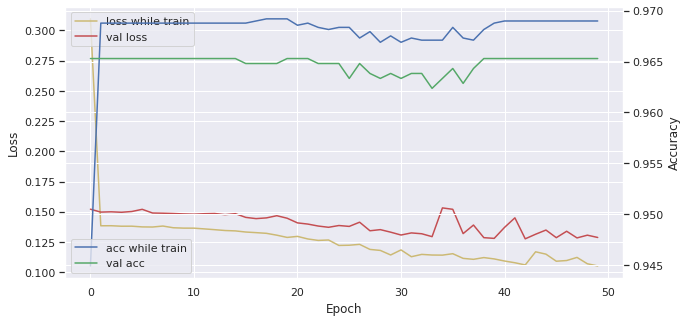

완료


In [16]:
print('입력할 계정 개수: ')
num = int(input())
for i in range(num):
  if i == 0:
    print('excel을 보고', 1, '번째 계정의 인덱스를 입력하세요: ')
    df1 = scaled_X[scaled_X.columns[int(input())]]
    continue
  print('excel을 보고', i+1, '번째 계정의 인덱스를 입력하세요: ')
  factor = int(input())
  df1 = pd.concat([df1, scaled_X[scaled_X.columns[factor]]], axis=1)
print('집계된 데이터는 다음과 같습니다.')
display(df1)
print('해당 데이터로 학습을 시작하겠습니까? (0-Yes, 1-No)')
answer = int(input())
if answer == 0:
  #데이터 스플릿
  X_train, X_test, y_train, y_test = train_test_split(df1, categorized_y, test_size=0.3, random_state=1)

  print(X_train.shape)
  print(X_test.shape)
  print(y_train.shape)
  print(y_test.shape)
  #모델설계
  model = Sequential()
  model.add(Dense(units=100, activation='relu', input_dim=num))
  model.add(Dense(units=50, activation='relu'))
  model.add(Dense(units=25, activation='relu'))
  model.add(Dense(units=10, activation='relu'))
  model.add(Dense(units=2, activation='sigmoid'))
  print('예측 모델의 layer는 아래와 같습니다.')
  model.summary()
  #학습
  print('예측 시작')
  model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
  hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1) 
  #결과
  print('결과')
  scores = model.evaluate(X_test, y_test)
  print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
  print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  plt.rcParams['figure.figsize'] = (10, 5)
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()


  loss_ax.plot(hist.history['loss'], 'y', label='loss while train')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


  acc_ax.plot(hist.history['accuracy'], 'b', label='acc while train')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

  loss_ax.set_xlabel('Epoch')
  loss_ax.set_ylabel('Loss')
  acc_ax.set_ylabel('Accuracy')

  loss_ax.legend(loc='upper left')
  acc_ax.legend(loc='lower left')
  print('モデル生成が進めていく時のLOSSとACCURACYの変化です。')
  plt.show()
print('완료')

계정 간의 상관관계에 대한 그래프 그리기
x축에 들어갈 계정의 index를 입력하세요
3
y축에 들어갈 계정의 index를 입력하세요
4


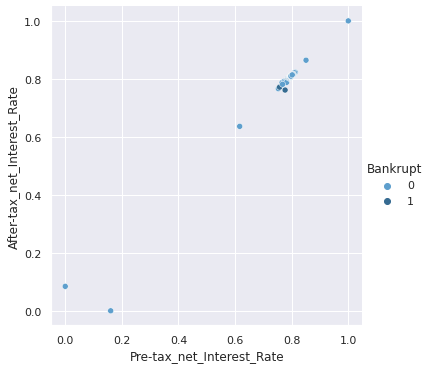

In [17]:
print('계정 간의 상관관계에 대한 그래프 그리기')
print('x축에 들어갈 계정의 index를 입력하세요')
x_feature = scaled_X.columns[int(input())]
print('y축에 들어갈 계정의 index를 입력하세요')
y_feature = scaled_X.columns[int(input())]

sns.relplot(x=x_feature, y=y_feature, hue='Bankrupt', data=raw_data, palette='Blues_d')